## Intro to Descriptive Statistics - Final Project

<p>Welcome! This is my final project report for Udacity's [Intro to Descriptive Statistics](https://www.udacity.com/course/intro-to-descriptive-statistics--ud827) class.</p>

### Playing cards experiment

For the final project, we are asked to conduct an experiment with a deck of playing cards. We assign each card a particular value, take samples from the deck and describe the distribution of the sample sums using visualizations and descriptive statistics.  
For more information, check out the [project description](https://docs.google.com/document/d/1059JMJ9C5dn7vKUrmfWYle57Ai3Uk9PzxPQBGj5drjE/pub) and [project rubric](https://docs.google.com/document/d/1gVCBsThTXBkUtMiccc4Rj5XT8I9h4ji0bpqTe2uUxRg/pub).

### Tasks

The experiment requires the use of a standard deck of playing cards. This is a deck of 52 cards divided into four suits (spades, hearts, diamonds, and clubs), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King).  

The numbered cards are assigned the same value, "Ace" card takes the value of 1 and face cards are assigned the value of 10. 

#### Simulating the deck of cards

In [2]:
import numpy as np
import pandas as pd

# Create a deck of cards

value = list(range(1, 10) + [10] * 4) * 4
suits = list(['Spade', 'Diamond', 'Heart', 'Club']) * 13
labels = list(['Ace', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Jack', 'Queen', 'King']) * 4

deck = pd.DataFrame([value, suits, labels]).transpose()
deck.columns = ['Card Value', 'Suit', 'Label']

# Print some of the cards
deck.head()

,Card Value,Suit,Label
0,1,Spade,Ace
1,2,Diamond,Two
2,3,Heart,Three
3,4,Club,Four
4,5,Spade,Five


#### Task 1. Histogram of card values
<i>First, create a histogram depicting the relative frequencies of the card values.</i>

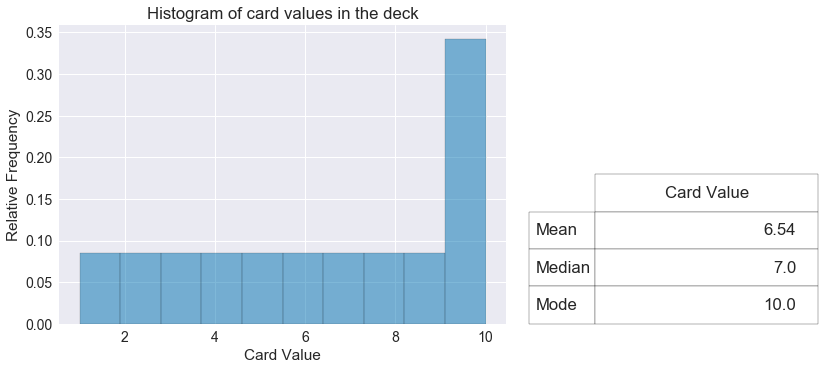

In [3]:
# Histogram of relative frequencies

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(font_scale = 1.4, palette='colorblind')

ax = deck['Card Value'].hist(bins = 10, normed = True, edgecolor = 'black', alpha = 0.5)
ax.set(ylabel="Relative Frequency", xlabel="Card Value", title="Histogram of card values in the deck")


row_labels = ['Mean', 'Median', 'Mode']

clust_data = [round(deck['Card Value'].mean(), 2), 
              deck['Card Value'].median(), 
              deck['Card Value'].mode()[0]]


ax.table(cellText=np.reshape(clust_data, (3,1)),
         colLabels = ['Card Value'], 
         rowLabels=row_labels, 
         loc = 'right', 
         colWidths=[.5,.5], bbox=[1.2, 0, 0.5, 0.5])

Looking at above histogram, we can see that the card value distribution would have been uniform if not for the peak. This is because the face cards have all been assigned the value 10. Instead we have a distribution that has a long left tail and the mean is to the left of the peak. This type of distribution is called <b>negatively skewed</b> or <b>left skewed</b> distribution.  

#### Task 2. Draw samples from the deck
<i>Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards' values. Replace the drawn cards back into the deck and repeat this sampling procedure a total of at least thirty times.</i>

In [4]:
# Take a sample of size = 3 and return a list with card values and their sum

import random
random.seed(100)

def getSample(df):
    fd = df.loc[random.sample(df.index, 3)]
    lst = ((fd.Label + ' of ' + fd.Suit).values).tolist()
    lst.append(fd['Card Value'].sum())
    return lst

In [5]:
# Take a single sample and print the sum of card values

single_sample = getSample(deck)
print single_sample

['Eight of Club', 'Jack of Club', 'Two of Spade', 20]


In [6]:
# Take 100 Samples and save the cards and their sum to a dataframe

cols = ['Card1', 'Card2', 'Card3', 'CardSum']
samples = pd.DataFrame(columns=cols)

for i in range(100):
    samp = getSample(deck)
    samp = pd.DataFrame([samp], columns = cols)
    samples = samples.append(samp, ignore_index = True)
  
# Print some of the samples

samples.head()

,Card1,Card2,Card3,CardSum
0,Jack of Spade,King of Heart,Ten of Heart,30.0
1,Three of Diamond,Two of Club,Five of Spade,10.0
2,Jack of Club,Three of Heart,Ten of Spade,23.0
3,Jack of Diamond,Five of Diamond,Four of Spade,19.0
4,Ace of Club,Jack of Heart,Ten of Diamond,21.0


#### Task 3. Report descriptive statistics of the samples

<i>Let's take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.</i>

In [7]:
# Reporting central tendency statistics

print '-----------------------------\nMeasures of central tendency\n-----------------------------'
print 'Mean\t |\t{0}\nMedian\t |\t{1}\nMode\t |\t{2}'.format(round(samples.CardSum.mean(), 2),
                                                            samples.CardSum.median(),
                                                            samples.CardSum.mode()[0])

print '\n---------------------------------------\nMeasures of variability\n---------------------------------------'
print 'Variance\t\t |\t{0}\nStandard Deviation\t |\t{1}\nIQR\t\t\t |\t{2}'.format(round(samples.CardSum.var(), 2),
                                                            round(samples.CardSum.std(), 2),
                                                            samples.CardSum.quantile(0.75) - samples.CardSum.quantile(0.25))

-----------------------------
Measures of central tendency
-----------------------------
Mean	 |	19.37
Median	 |	19.0
Mode	 |	21.0

---------------------------------------
Measures of variability
---------------------------------------
Variance		 |	29.75
Standard Deviation	 |	5.45
IQR			 |	8.0


#### Task 4. Histogram of card sums
<i>Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?
</i>

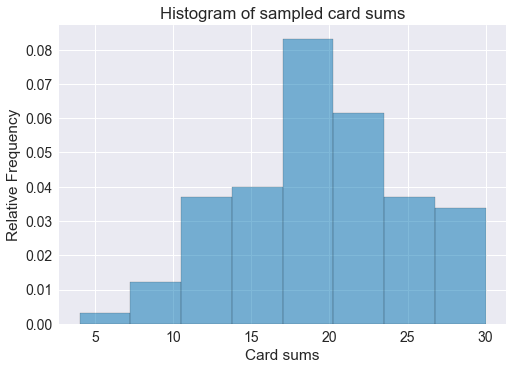

In [8]:
# Distribution of card sums

ax1 = samples.CardSum.hist(normed = True, edgecolor = 'black', alpha = 0.5, bins = 8)


ax1.set(ylabel="Relative Frequency", 
        xlabel="Card sums", 
        title="Histogram of sampled card sums")

<b>Difference between the distributions:</b>

The original distribution is highly skewed. The card sum distribution although a little skewed looks almost normal. 
This can be explained by the <b>Central Limit Theorem</b>: For a population of any shape, if you draw larger and larger samples and record their sums or means, the distribution of this recorded statistic approaches a normal shape with increase in sample size.

This normal distribution has a mean of original mean multiplies by the sample size (3) and a standard deviation equal to original standard deviation multiplied by square root of sample size.

#### Task 5. Estimates from the samples
<i>Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.</i>

<b>Range for 90% values</b>: To compute the range, 
1. we use the norm.ppf function from scipy library to find the Z-score for the p-value of 0.05 and 0.95,
2. then we compute the margin of error using the formula, $$margin = zscore * SE$$. Where SE is standard error. $$SE = \sigma / \sqrt{n}$$. Since our distribution is of card value sums rather than means, $$SE = (\sigma * \sqrt{n}) / \sqrt{n} = \sigma$$
3. 90% of the values will lie in the range of mean +/- margin

In [9]:
# Computing the range for 90% of draws card sums

import scipy.stats as st

zscore = st.norm.ppf(.05)
print 'z-score for probability 0.05 = {0}'.format(zscore)

margin_of_error = zscore * samples.CardSum.std()

print '90% of the sum of drawn cards will fall approzimately between {0} and {1}'.format(
    samples.CardSum.mean() + margin_of_error, 
    samples.CardSum.mean() - margin_of_error)

z-score for probability 0.05 = -1.64485362695
90% of the sum of drawn cards will fall approzimately between 10.398291273 and 28.341708727


<b>Probability of drawing at least 20</b>: 
1. We compute the Z-score for 20
2. We find the p-value for the Z-value
3. 1 - p-value, gives the aprrox. probability of drawing at least 20

In [10]:
# Approx. probability of drawing cards with the sum of at least 20

zscore = (20 - samples.CardSum.mean()) / samples.CardSum.std()

print 'z-score for the value 20 = {0}'.format(zscore)

prob = 1 - st.norm.cdf(zscore)

print 'Probability of drawing a sample with the card value sum at least 20 is {0}'.format(prob)

z-score for the value 20 = 0.115502834132
Probability of drawing a sample with the card value sum at least 20 is 0.4540232871
